In [27]:
import pandas as pd
import numpy as np
import pickle
import gensim
import numpy as np
import seaborn as sns
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim.utils import lemmatize
from pprint import pprint
import matplotlib.pyplot as plt
import pyLDAvis.gensim

In [20]:
%matplotlib inline

In [2]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit

    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())

    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

    return lm_list, c_v

def perform_filtering(documents):
    # Aggressive stopword list (http://www.webconfs.com/stop-words.php)
    stopwords = open( 'stop_words.txt', 'r').readlines()
    stopwords = [words.strip('\n') for words in stopwords]

    # iterate over the dataframe
    # remove stop words, upper case letters
    for index, row in documents.iterrows():
        temp = documents.iloc[index,1].lower()
        temp = " ".join([word for word in temp.split() if word not in stopwords])
        documents.iloc[index, 1] = temp
    return documents


def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit

    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())

    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

    return lm_list, c_v

In [4]:
# load the document texts
with open('course_text.pickle', 'rb') as handle:
    documents = pickle.load(handle)

In [9]:
# preprocess the document texts
filtered_documents = perform_filtering(documents)
train_texts = list(filtered_documents['content'])
train_texts = [i.split() for i in train_texts]

In [ ]:
print(train_texts)

In [11]:
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]

In [14]:
# LDA model
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldatopics = ldamodel.show_topics(formatted=False)

In [13]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)


c:\users\weiyuc~1\venv\nti_sk~1\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      19.422117        1       1  0.078108  0.096685
7      18.173233        1       2  0.152101  0.032224
3      17.032204        1       3 -0.159043  0.102541
8      13.948703        1       4  0.048363 -0.024617
0      13.307264        1       5  0.122511 -0.048662
2       8.830208        1       6 -0.068276 -0.106736
9       3.618128        1       7 -0.013984  0.020593
4       3.106073        1       8 -0.073310 -0.027699
1       2.075649        1       9 -0.052961 -0.025293
5       0.486418        1      10 -0.033510 -0.019036, topic_info=     Category       Freq           Term      Total  loglift  logprob
term                                                                
107   Default   4.000000           harm   4.000000  30.0000  30.0000
111   Default   3.000000      reduction   3.000000  29.0000  29.0000
174   Default  10.000000        harmful  10.000000  28.0000  28.0000
7     Default  18.000000        product  18.000000  27.0000  27.0000
0     Default  23.000000              a  23.000000  26.0000  26.0000
61    Default  12.000000       platform  12.000000  25.0000  25.0000
69    Default  10.000000           burn  10.000000  24.0000  24.0000
140   Default   6.000000         actual   6.000000  23.0000  23.0000
56    Default   3.000000    development   3.000000  22.0000  22.0000
81    Default   5.000000           risk   5.000000  21.0000  21.0000
122   Default   3.000000         morris   3.000000  20.0000  20.0000
121   Default   3.000000  international   3.000000  19.0000  19.0000
74    Default  16.000000           heat  16.000000  18.0000  18.0000
123   Default   2.000000        phillip   2.000000  17.0000  17.0000
47    Default   4.000000            rrp   4.000000  16.0000  16.0000
173   Default   7.000000       generate   7.000000  15.0000  15.0000
40    Default   2.000000         patent   2.000000  14.0000  14.0000
151   Default   6.000000           fact   6.000000  13.0000  13.0000
240   Default   7.000000           zone   7.000000  12.0000  12.0000
139   Default   9.000000          smoke   9.000000  11.0000  11.0000
11    Default   3.000000           work   3.000000  10.0000  10.0000
77    Default   6.000000      portfolio   6.000000   9.0000   9.0000
80    Default   9.000000         reduce   9.000000   8.0000   8.0000
147   Default   1.000000        benefit   1.000000   7.0000   7.0000
210   Default   2.000000    significant   2.000000   6.0000   6.0000
52    Default   3.000000           term   3.000000   5.0000   5.0000
14    Default   8.000000      cigarette   8.000000   4.0000   4.0000
23    Default   3.000000          piece   3.000000   3.0000   3.0000
95    Default   7.000000      potential   7.000000   2.0000   2.0000
54    Default   1.000000           2003   1.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
0     Topic10   0.011547              a  23.325083  -2.2850  -5.6823
7     Topic10   0.011544        product  18.160858  -2.0350  -5.6825
74    Topic10   0.011543           heat  16.052534  -1.9117  -5.6826
72    Topic10   0.011541           easy   1.386946   0.5369  -5.6827
76    Topic10   0.011540        picture   1.386956   0.5368  -5.6829
75    Topic10   0.011539       nicotine   6.842549  -1.0593  -5.6829
28    Topic10   0.011539        tobacco  20.583391  -2.1606  -5.6829
69    Topic10   0.011539           burn  10.228426  -1.4613  -5.6829
2     Topic10   0.011538           full   2.157325   0.0949  -5.6830
81    Topic10   0.011538           risk   5.525515  -0.8457  -5.6831
78    Topic10   0.011537      principal   2.136553   0.1045  -5.6831
79    Topic10   0.011537          proof   1.386971   0.5366  -5.6831
82    Topic10   0.011536         secret   1.386975   0.5365  -5.6832
73    Topic10   0.011536           hear   1.386976   0.5365  -5.6832
68    Topic10   0.011536          basic   1.386977   0.5365  -5.68

In [17]:
# HDP model
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
# hdpmodel.show_topics()
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel, corpus, dictionary)


c:\users\weiyuc~1\venv\nti_sk~1\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=               Freq  cluster  topics         x         y
topic                                                   
4      1.976089e+01        1       1 -0.030293  0.013944
34     7.526759e+00        1       2 -0.002503  0.035506
38     6.029492e+00        1       3 -0.010132  0.011412
1      4.935991e+00        1       4  0.008580  0.009336
22     4.620204e+00        1       5  0.021275  0.004036
5      3.437466e+00        1       6  0.008389 -0.023189
147    3.162343e+00        1       7 -0.006078 -0.000392
18     3.096841e+00        1       8  0.029553  0.006511
15     2.796811e+00        1       9 -0.008412 -0.006479
82     2.732788e+00        1      10  0.029681  0.011246
7      2.594661e+00        1      11  0.012978 -0.009525
33     2.456266e+00        1      12 -0.054606  0.054885
54     2.318017e+00        1      13 -0.004961  0.025905
17     2.146134e+00        1      14  0.026773  0.002625
52     2.002690e+00        1      15 -0.006760 -0.020783
126    1.780827e+00        1      16 -0.023575 -0.008349
74     1.780195e+00        1      17 -0.005185 -0.052418
68     1.777735e+00        1      18 -0.021928  0.002067
98     1.764040e+00        1      19  0.005592  0.006518
6      1.719768e+00        1      20 -0.015224  0.014156
3      1.649510e+00        1      21 -0.044701 -0.025187
112    1.622625e+00        1      22 -0.008279  0.012338
28     1.558912e+00        1      23  0.026431  0.002513
61     1.484184e+00        1      24 -0.025248  0.024801
31     1.347254e+00        1      25  0.050427  0.014152
145    1.252937e+00        1      26  0.033298  0.001727
122    1.155113e+00        1      27 -0.036577 -0.042494
115    1.143376e+00        1      28 -0.016429 -0.024740
60     1.098286e+00        1      29  0.017893 -0.008514
90     1.075144e+00        1      30  0.010258  0.012044
...             ...      ...     ...       ...       ...
111    5.350279e-12        1     121 -0.011997  0.002749
113    2.311574e-12        1     122  0.010200 -0.006090
114    1.610752e-12        1     123  0.052298 -0.014594
117    4.195074e-13        1     124  0.002132  0.004011
119    1.775690e-13        1     125 -0.002309 -0.041909
120    1.394228e-13        1     126  0.004531 -0.014716
123    2.552684e-14        1     127  0.009424  0.025051
124    1.455770e-14        1     128 -0.023478  0.029537
125    8.641546e-15        1     129 -0.039179  0.017698
127    3.012564e-15        1     130 -0.030485 -0.015563
128    1.768522e-15        1     131  0.015388 -0.015051
129    1.023796e-15        1     132  0.040205 -0.039781
130    5.947693e-16        1     133  0.006047 -0.023886
131    3.450840e-16        1     134  0.007882  0.015746
132    2.000550e-16        1     135 -0.010520 -0.013528
133    1.156207e-16        1     136 -0.012308 -0.005863
134    6.691430e-17        1     137 -0.054160  0.031832
135    3.848788e-17        1     138 -0.008767 -0.013757
136    2.200483e-17        1     139  0.042338  0.041322
137    1.263642e-17        1     140  0.018549  0.015723
138    7.196420e-18        1     141  0.029201  0.014252
139    4.094756e-18        1     142 -0.018568 -0.003545
140    2.326496e-18        1     143  0.010761 -0.003542
141    1.355312e-18        1     144 -0.007890  0.015854
142    7.403219e-19        1     145 -0.005431 -0.020592
143    4.141727e-19        1     146 -0.046731  0.023346
144    2.323187e-19        1     147  0.010959 -0.018025
146    7.105064e-20        1     148  0.029224  0.027805
148    1.972992e-20        1     149 -0.023707 -0.019379
149    1.972953e-20        1     150  0.029381  0.006746

[150 rows x 5 columns], topic_info=      Category          Freq            Term     Total  loglift  logprob
term                                                                    
0      Default  6.000000e+00               a  6.000000  30.0000  30.0000
218    Default  4.000000e+00            high  4.000000  29.0000  29.0000
276    Default  4.000000e+00         network  4.00

In [ ]:
# LDA coherence
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=train_texts, limit=10)

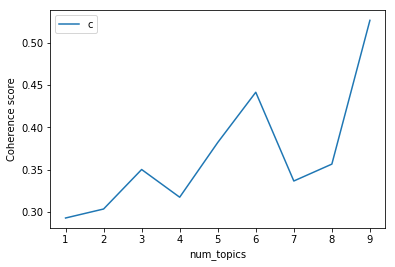

In [23]:
# Show graph of coherence value
x = range(1, 10)
plt.plot(x, c_v)
plt.xlabel("num_topics")
plt.ylabel("Coherence score")
plt.legend(("c_v"), loc='best')
plt.show()

In [25]:
# LDA model tuned after coherence
ldamodel = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary)
ldatopics = ldamodel.show_topics(formatted=False)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldatopics, corpus, dictionary)


In [26]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)


c:\users\weiyuc~1\venv\nti_sk~1\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      26.376495        1       1 -0.049172 -0.010110
1      22.103415        1       2  0.072738 -0.100915
5      17.038403        1       3  0.067987  0.068366
3      14.607683        1       4 -0.104014  0.007083
4      12.861397        1       5 -0.018382 -0.037271
0       7.012609        1       6  0.030844  0.072847, topic_info=     Category       Freq          Term      Total  loglift  logprob
term                                                               
139   Default   7.000000         smoke   7.000000  30.0000  30.0000
240   Default   6.000000          zone   6.000000  29.0000  29.0000
74    Default  15.000000          heat  15.000000  28.0000  28.0000
178   Default   5.000000       aerosol   5.000000  27.0000  27.0000
174   Default  10.000000       harmful  10.000000  26.0000  26.0000
40    Default   2.000000        patent   2.000000  25.0000  25.0000
61    Default  11.000000      platform  11.000000  24.0000  24.0000
200   Default   4.000000       release   4.000000  23.0000  23.0000
47    Default   4.000000           rrp   4.000000  22.0000  22.0000
10    Default   4.000000         video   4.000000  21.0000  21.0000
35    Default   1.000000         basis   1.000000  20.0000  20.0000
25    Default   2.000000     scientist   2.000000  19.0000  19.0000
15    Default   2.000000         class   2.000000  18.0000  18.0000
252   Default   3.000000        flavor   3.000000  17.0000  17.0000
30    Default   3.000000         world   3.000000  16.0000  16.0000
95    Default   7.000000     potential   7.000000  15.0000  15.0000
80    Default   9.000000        reduce   9.000000  14.0000  14.0000
36    Default   1.000000         legal   1.000000  13.0000  13.0000
195   Default   4.000000          call   4.000000  12.0000  12.0000
173   Default   7.000000      generate   7.000000  11.0000  11.0000
69    Default  10.000000          burn  10.000000  10.0000  10.0000
17    Default   1.000000      continue   1.000000   9.0000   9.0000
251   Default   2.000000  distillation   2.000000   8.0000   8.0000
188   Default   2.000000        liquid   2.000000   7.0000   7.0000
0     Default  21.000000             a  21.000000   6.0000   6.0000
75    Default   6.000000      nicotine   6.000000   5.0000   5.0000
56    Default   3.000000   development   3.000000   4.0000   4.0000
197   Default   3.000000          form   3.000000   3.0000   3.0000
118   Default   1.000000          tune   1.000000   2.0000   2.0000
115   Default   1.000000       content   1.000000   1.0000   1.0000
...       ...        ...           ...        ...      ...      ...
40     Topic6   1.158161        patent   2.499571   1.8882  -3.7425
36     Topic6   0.742099         legal   1.900750   1.7169  -4.1876
33     Topic6   0.484650           500   1.286892   1.6809  -4.6137
42     Topic6   0.481173      pipeline   1.287220   1.6734  -4.6209
43     Topic6   0.455469   proprietary   1.289657   1.6167  -4.6758
17     Topic6   0.679547      continue   1.927245   1.6150  -4.2757
37     Topic6   0.451887        locate   1.290001   1.6085  -4.6836
45     Topic6   0.443307       related   1.290812   1.5887  -4.7028
32     Topic6   0.441308          1000   1.291000   1.5840  -4.7073
39     Topic6   0.441064     neuchatel   1.291021   1.5835  -4.7079
34     Topic6   0.434922   application   1.291611   1.5690  -4.7219
188    Topic6   0.679726        liquid   2.028396   1.5641  -4.2754
41     Topic6   0.431959       pending   1.291887   1.5619  -4.7288
48     Topic6   0.415140        sector   1.293480   1.5210  -4.7685
38     Topic6   0.409583          long   1.294006   1.5071  -4.7819
47     Topic6   1.071084           rrp   4.724844   1.1733  -3.8207
49     Topic6   0.420941     singapore   1.917388   1.1412  -4.7546
44     Topic6   0.452634    protection   2.069098   1.1377  -4.6820
50     Topic6   0.413632   switzerland   1.918346   1.123